# 비지도학습 실습 - DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, load_iris
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## blobs dataset example

In [2]:
X, y = make_blobs(random_state=0, n_samples=12)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (12, 2)
y.shape: (12,)


In [3]:
print(y)

[1 0 2 0 0 1 1 2 0 2 2 1]


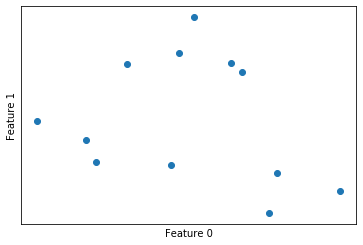

In [4]:
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [6]:
assignments_X = dbscan.labels_
print(assignments_X)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


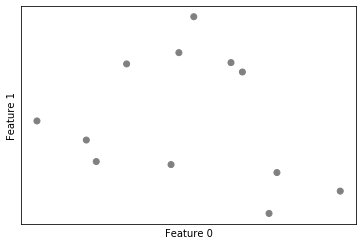

In [7]:
LABEL_COLOR_MAP = {-1: 'gray', 0 : 'r', 1 : 'g', 2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in assignments_X]
plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.xticks(())
plt.yticks(())

plt.show()

min_samples: 2 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 5 eps: 1.000000 cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]


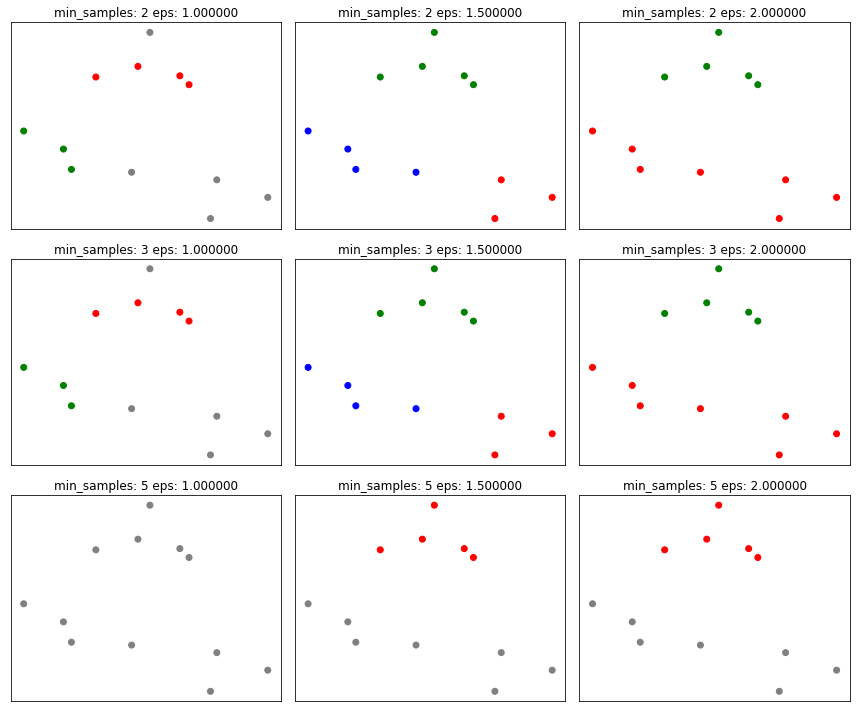

In [8]:
eps_settings = [1, 1.5, 2]
min_samples_settings = [2, 3, 5]

pos = [331, 332, 333, 334, 335, 336, 337, 338, 339]

plt.figure(figsize=(12, 10))


i = 0
for min_samples in min_samples_settings:
    for eps in eps_settings:
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        assignments_X = dbscan.labels_
        print('min_samples: %d eps: %f cluster: %s'%(min_samples, eps, str(assignments_X)))
    
        label_color = [LABEL_COLOR_MAP[l] for l in assignments_X]

        plt.subplot(pos[i])
        plt.scatter(X[:, 0], X[:, 1], c=label_color)

        plt.xticks(())
        plt.yticks(())

        plt.title('min_samples: %d eps: %f'%(min_samples, eps))

        i = i + 1

plt.tight_layout()
plt.show()

In [9]:
scaler = MinMaxScaler((-1,1))
X_scaled = scaler.fit_transform(X)

In [10]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [11]:
assignments_X_sclaed = dbscan.labels_
print(assignments_X_sclaed)

[-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]


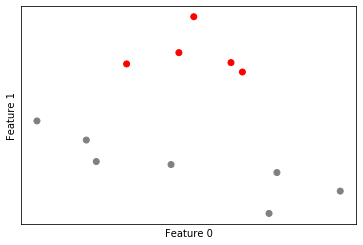

In [12]:
label_color = [LABEL_COLOR_MAP[l] for l in assignments_X]

plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.xticks(())
plt.yticks(())

plt.show()

## iris dataset example

In [13]:
iris = load_iris()
X, y = iris.data, iris.target
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (150, 4)
y.shape: (150,)


In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


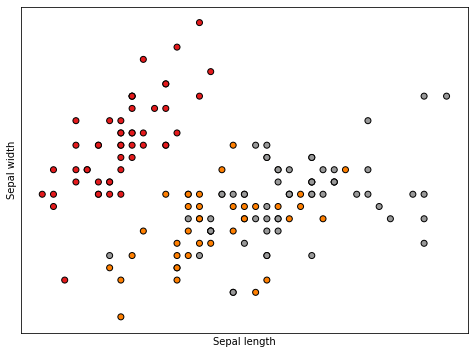

In [15]:
plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()

In [16]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [17]:
assignments_X = dbscan.labels_
print(assignments_X)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


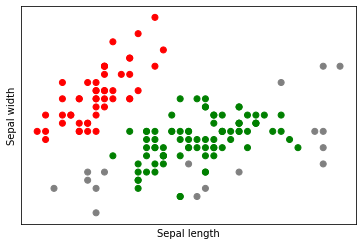

In [18]:
label_color = [LABEL_COLOR_MAP[l] for l in assignments_X]

plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()

## Scaling 적용

### Standard scaling

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [21]:
assignments_X_scaled = dbscan.labels_
print(assignments_X_scaled)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


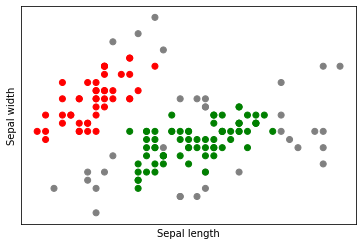

In [22]:
label_color = [LABEL_COLOR_MAP[l] for l in assignments_X_scaled]

plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()

### Minmax scaling

In [23]:
scaler = MinMaxScaler((-1,1))
X_scaled = scaler.fit_transform(X)

In [24]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [25]:
assignments_X_scaled = dbscan.labels_
print(assignments_X_scaled)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


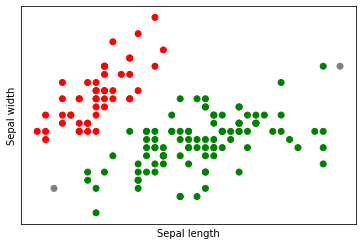

In [26]:
label_color = [LABEL_COLOR_MAP[l] for l in assignments_X_scaled]

plt.scatter(X[:, 0], X[:, 1], c=label_color)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()